In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset FinPro.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. UNIVARIATE ANALYSIS

NameError: name 'features' is not defined

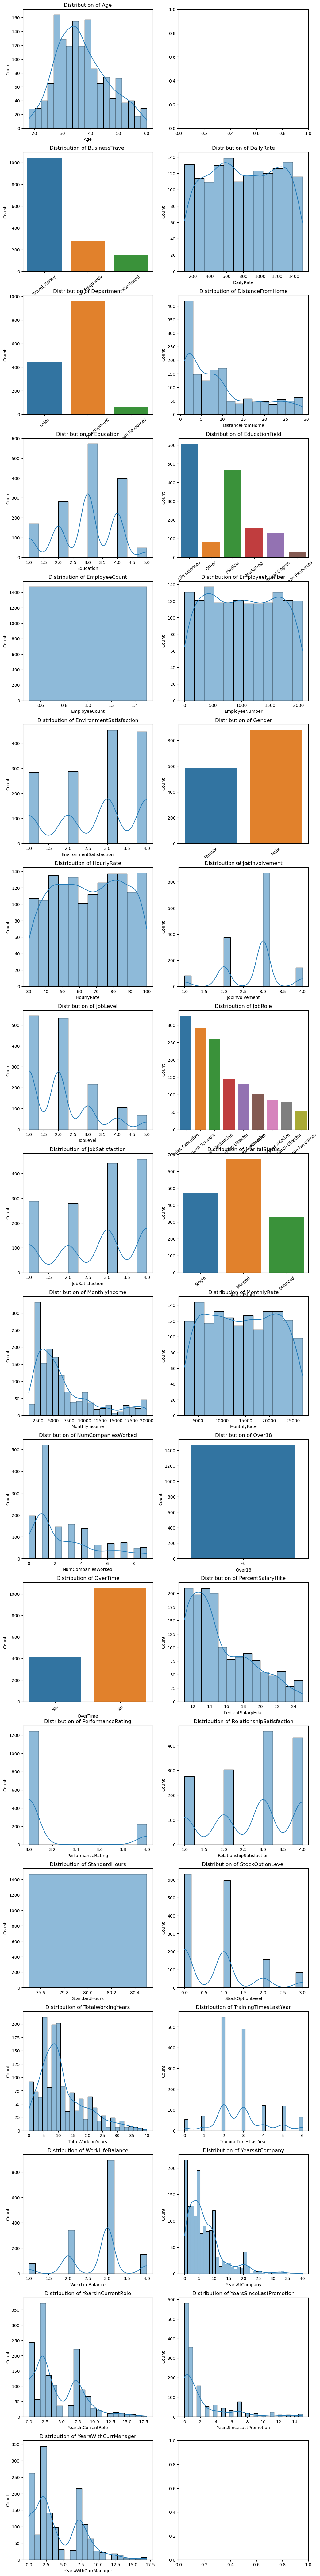

In [3]:
# Mendefinisikan target
target = 'Attrition'

# Mengatur jumlah kolom dalam setiap baris subplot
columns_per_row = 2

# Menghitung jumlah total baris subplot yang dibutuhkan
total_rows = (len(df.columns) - 1) // columns_per_row + 1

# Membuat figure dengan ukuran yang sesuai
fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(12, 6 * total_rows))

# Melakukan visualisasi untuk setiap kolom dalam dataset
for i, column in enumerate(df.columns):
    if column != target:
        # Menghitung posisi subplot
        subplot_row = i // columns_per_row
        subplot_col = i % columns_per_row

        # Mengatur subplot yang sedang aktif
        ax = axes[subplot_row, subplot_col]

        if df[column].dtype == 'object':
            # Jika kolom adalah tipe data kategorikal
            sns.countplot(data=df, x=column, ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
        else:
            # Jika kolom adalah tipe data numerik
            sns.histplot(data=df, x=column, kde=True, ax=ax)

        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {column}')
        
# Menyembunyikan subplot yang tidak digunakan
if len(features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

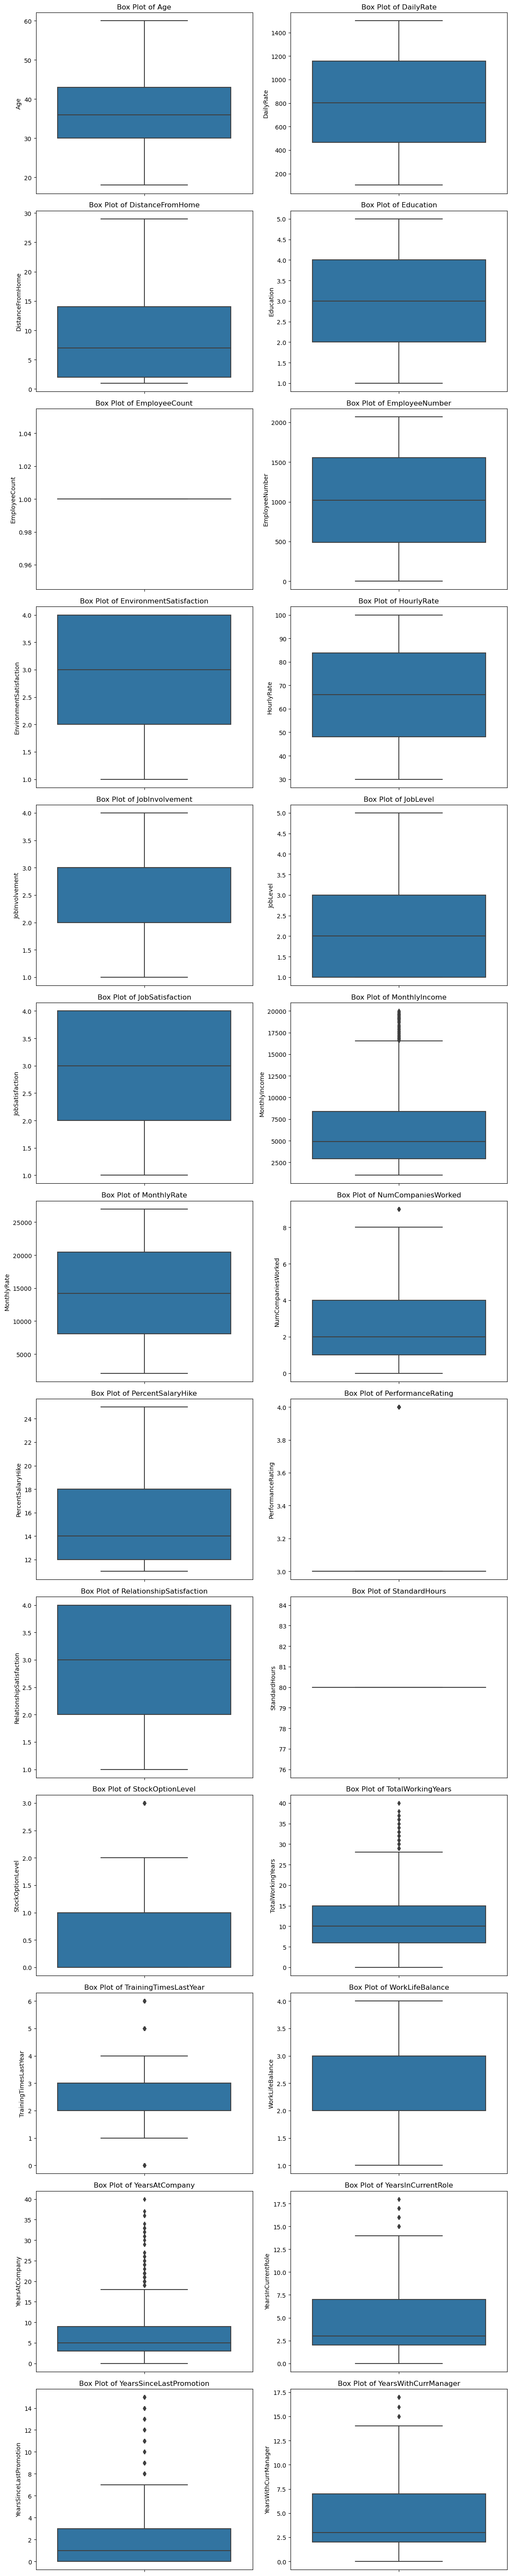

In [4]:
# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(13, 2, figsize=(12, 60))

# Mengambil daftar fitur numerik
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Melakukan box plot untuk masing-masing fitur
for i, feature in enumerate(numeric_features):
    ax = axes[i // 2, i % 2]
    sns.boxplot(data=df, y=feature, ax=ax)
    ax.set_ylabel(feature)
    ax.set_title(f'Box Plot of {feature}')

# Menghilangkan subplot yang tidak digunakan
if len(numeric_features) % 2 != 0:
    axes[-1, -1].remove()

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Hasil observasi: ####
- Terdapat distribusi data unimodal (Distribusi memiliki 1 titik peak) antara lain; Age, DistanceFromHome, MonthlyIncome, NumCompaniessWorked, YearsSinceLastPromotion, TotalWorkingYears, PercentSalaryHike, YearsAtCompany.
- Terdapat distribusi bimodal (Distribusi dengan 2 peak) antara lain; PerformanceRating, HourlyRate, MonthlyRate, TrainingTimesLastYear, YearsInCurrentRole, YearsWithCurrManager. 
- Terdapat distribusi multimodal (Lebih dari 2 peak) antara lain; Education, EnvirontmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance.
- Sementara itu, terdapat jenis distribusi berdasarkan skewnessnya antara lain; Normal(Age) dan Positively Skewed(DistanceFromHome, MonthlyIncome, NumCompaniessWorked, PercentSalaryHike, YearsSinceLastPromotion, TotalWorkingYears, YearsAtCompany)
- Terdapat outlier pada fitur MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion & YearsWithCurrManager.

#### Rekomendasi untuk fase pre-processing: ####
- Perlu melakukan logtransformation pada fitur dengan jenis distribusi positively skewed
- Melakukan handling outlier dengan Z-score > 3 pada fitur-fitur yang memiliki outlier

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Dataset FinPro.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
